In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.kmeans_python import kmeans_py

In [2]:
data = np.loadtxt('datasets/a3.txt')
c = np.loadtxt('datasets/a3-c.txt')
gt = np.loadtxt('datasets/a3-pa.txt')

In [3]:
gt

array([ 9.,  9.,  9., ..., 20., 20., 20.])

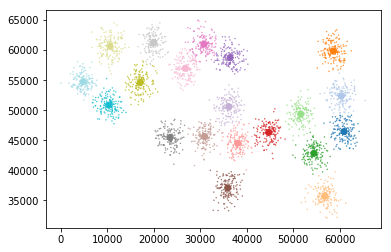

In [3]:
plt.scatter(data[:,0], data[:,1], marker='.', c=gt, s=0.7, cmap='tab20')
plt.scatter(c[:,0], c[:,1], marker='o', c=range(c.shape[0]), cmap='tab20')
plt.show()

In [4]:
n = data.shape[0]
k = c.shape[0]
max_iter = 100

In [6]:
np.array([data[:, 0], ] * k).shape

(20, 3000)

In [7]:
np.array([c[:,0],] * n).shape

(3000, 20)

In [5]:
np.random.shuffle(data)

In [7]:
groups, cens, costs = kmeans_py(data, c, max_iter)

In [9]:
np.array(cens).shape

(100, 20, 2)

In [10]:
np.array(groups).shape

(100, 3000)

In [41]:
def plot_clusters(data, iter_num, group, centroid, ax):
    ax.scatter(data[:,0], data[:,1], marker='.', c=group, s=0.7, cmap='tab20')
    ax.scatter(centroid[:,0], centroid[:,1], marker='o', c=range(centroid.shape[0]), cmap='tab20')
    ax.set_title("iteration "+str(iter_num))

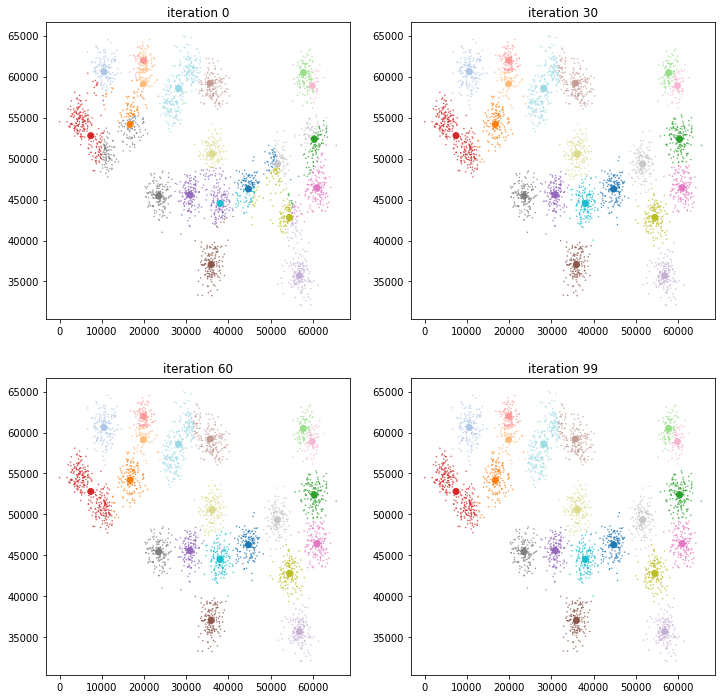

In [46]:
fig, axe = plt.subplots(2,2,figsize=(12,12))
need = [0, 30, 60, 99]
for i in range(max_iter):
    if i in need:
        idx = need.index(i)
        plot_clusters(data, i, groups[i], cens[i], axe[idx//2][idx%2])

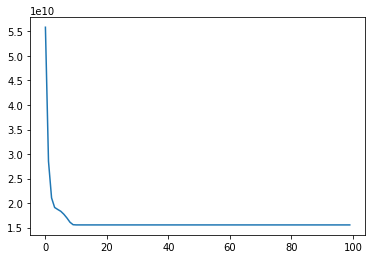

In [31]:
plt.plot(costs)
plt.show()

In [4]:
from src.util import expand_dataset

In [5]:
newx, newpa = expand_dataset(data, c, gt, 100000)

In [7]:
newx.shape

(100000, 2)

In [8]:
newpa.shape

(100000,)

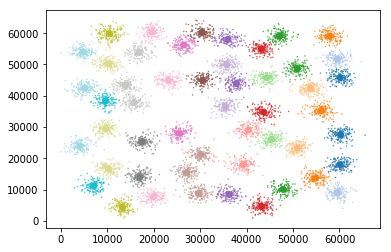

In [9]:
plt.scatter(newx[:,0], newx[:,1], marker='.', c=newpa, s=0.7, cmap='tab20')
plt.scatter(c[:,0], c[:,1], marker='o', c=range(c.shape[0]), cmap='tab20')
plt.show()